In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import optuna

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31141,0,1,1,20,1,0,0,1,1,1,...,1,0,2,0,0,0,1,12,6,8
98230,0,0,1,34,0,0,0,1,0,1,...,1,0,3,0,0,0,1,8,5,8
89662,1,1,1,24,0,0,0,1,1,1,...,1,0,2,0,5,0,1,12,5,6
208255,0,1,1,27,0,0,0,1,1,1,...,1,0,1,0,0,0,1,5,6,7
233415,0,1,1,24,0,0,0,1,1,1,...,1,0,3,0,0,1,0,12,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1,0,1,45,1,0,0,1,1,0,...,1,1,1,15,0,0,0,5,4,1
103694,1,1,1,29,1,0,0,1,0,1,...,1,0,3,0,0,0,1,11,6,7
131932,0,1,1,25,0,0,0,1,1,1,...,1,0,2,0,3,0,0,9,6,8
146867,0,0,0,23,0,0,0,0,1,1,...,1,1,2,0,0,0,0,5,6,6


In [5]:
y_train

,Diabetes_binary
31141,0
98230,0
89662,1
208255,0
233415,0
...,...
119879,0
103694,0
131932,0
146867,0


In [6]:
X.isna().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
y.isna().sum()

Diabetes_binary    0
dtype: int64

In [8]:
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,0,0,1,21,0,0,0,0,1,1,...,1,0,3,3,7,0,0,7,4,2
132821,1,1,1,28,0,0,0,1,1,1,...,1,0,3,0,0,0,0,13,6,6
151862,0,0,1,24,0,0,0,1,1,1,...,1,0,1,0,0,0,1,1,4,7
139717,0,0,1,27,1,0,0,1,0,1,...,1,0,2,3,0,0,1,2,4,7
239235,0,1,1,31,1,0,0,0,1,1,...,1,1,4,27,27,1,0,8,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169513,1,0,1,29,1,0,0,1,1,1,...,1,0,3,0,10,0,0,9,6,7
182415,0,0,1,25,0,0,0,1,1,1,...,1,0,2,1,10,0,0,10,5,8
109739,0,1,1,28,0,0,0,1,1,1,...,1,0,3,3,0,0,1,6,6,8
181671,0,0,1,24,1,0,0,0,0,1,...,1,1,4,0,0,0,1,13,4,5


In [9]:
y_test

,Diabetes_binary
219620,0
132821,0
151862,0
139717,0
239235,0
...,...
169513,1
182415,0
109739,0
181671,0


In [10]:
X_train.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [11]:
X_test.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [12]:
y_train.dtypes

Diabetes_binary    int64
dtype: object

In [13]:
X_train.shape

(202944, 21)

In [14]:
y_train.shape

(202944, 1)

In [15]:
X_test.shape

(50736, 21)

In [16]:
y_test.shape

(50736, 1)

In [17]:
y_test.dtypes

Diabetes_binary    int64
dtype: object

In [18]:
y_train = y_train.values.ravel()
y_test  = y_test.values.ravel()


In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

def objective(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 200, 1600),
        max_depth=trial.suggest_int('max_depth', 2, 64, log=True),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=cv,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores.mean()

study = optuna.create_study(direction='maximize', study_name='RandomForestClassifier')
study.optimize(objective, n_trials=100, show_progress_bar=True)


[I 2026-01-23 23:17:47,784] A new study created in memory with name: RandomForestClassifier


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-23 23:19:59,414] Trial 0 finished with value: 0.559976717716317 and parameters: {'n_estimators': 1105, 'max_depth': 21, 'min_samples_split': 14, 'min_samples_leaf': 12, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.559976717716317.
[I 2026-01-23 23:20:13,965] Trial 1 finished with value: 0.5806461909491023 and parameters: {'n_estimators': 622, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 19, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.5806461909491023.
[I 2026-01-23 23:21:54,359] Trial 2 finished with value: 0.5843489476129957 and parameters: {'n_estimators': 780, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}. Best is trial 2 with value: 0.5843489476129957.
[I 2026-01-23 23:22:12,133] Trial 3 finished with value: 0.5833331530235589 and parameters: {'n_estimators': 818, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features'

In [22]:
print("without any donwsampling or upsampling: best params :")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))


without any donwsampling or upsampling: best params :
  Value:  0.5985938098293587
  Params: 
    n_estimators: 537
    max_depth: 10
    min_samples_split: 14
    min_samples_leaf: 17
    max_features: log2
    bootstrap: False


In [56]:
best_rf = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)

In [57]:
y_pred_best

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

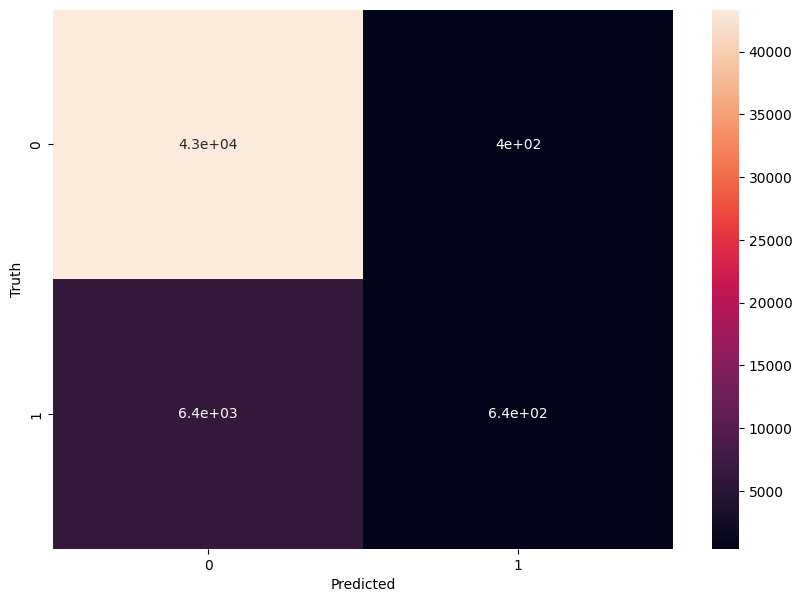

In [60]:
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [3]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [4]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [5]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

In [6]:
from sklearn.utils import resample

# Combine X and y for easy manipulation
df = X.copy()
df['Diabetes_binary'] = y.values

# Separate classes
df_majority = df[df['Diabetes_binary'] == 0]
df_minority = df[df['Diabetes_binary'] == 1]

print(df_majority.shape, df_minority.shape)


(218334, 22) (35346, 22)


In [7]:
n_minority = len(df_minority)
n_majority_down = n_minority * 3  # 2:1 ratio

df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=n_majority_down,
    random_state=42
)

# Combine back
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle
df_downsampled = df_downsampled.sample(frac=1, random_state=42)

# Split back into X, y
X_down = df_downsampled.drop(columns='Diabetes_binary')
y_down = df_downsampled['Diabetes_binary']

print(y_down.value_counts())


Diabetes_binary
0    106038
1     35346
Name: count, dtype: int64


In [32]:
X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(X_down, y_down, test_size=0.2, random_state=42)

In [33]:
X_train_downsampled

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
100202,0,0,1,27,1,0,0,1,1,1,...,1,0,1,0,0,0,1,9,6,7
126899,0,0,1,33,0,0,0,1,0,1,...,1,0,4,30,30,0,0,1,3,1
237170,0,0,1,29,0,0,0,0,1,1,...,1,0,2,10,0,0,0,2,5,6
116640,0,1,1,22,1,0,0,1,1,0,...,1,0,1,0,0,0,0,7,4,6
117833,0,1,1,20,0,0,0,1,1,1,...,1,0,1,2,0,0,0,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247874,1,1,1,27,1,0,0,1,0,1,...,1,0,4,5,2,0,1,5,5,8
114007,0,0,1,19,1,0,0,1,1,1,...,1,0,3,0,0,0,0,11,6,7
139996,1,1,1,38,0,0,0,1,0,0,...,1,0,3,15,5,0,1,6,5,6
167556,0,0,1,28,0,0,0,0,0,0,...,1,1,2,0,0,0,1,2,6,6


In [34]:
y_train_downsampled

100202    0
126899    0
237170    0
116640    0
117833    0
         ..
247874    1
114007    0
139996    1
167556    0
113214    0
Name: Diabetes_binary, Length: 113107, dtype: int64

In [35]:
X_test_downsampled

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
23602,0,0,0,23,1,0,0,1,0,0,...,1,0,2,0,0,0,0,10,6,5
185697,1,0,1,30,1,0,0,1,1,1,...,1,0,3,0,5,1,1,13,4,4
11245,1,1,1,35,0,0,0,1,1,1,...,1,0,4,15,0,0,0,10,6,3
196872,0,0,0,23,1,0,0,1,1,1,...,1,0,2,0,30,0,1,5,6,7
35794,0,0,1,28,0,0,0,0,1,1,...,1,0,3,3,0,0,0,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154169,1,1,1,32,1,0,0,1,1,1,...,1,0,3,0,4,0,0,11,5,6
222215,1,0,1,25,1,0,0,1,0,1,...,1,0,2,0,0,0,1,13,2,4
168585,1,1,1,25,1,1,0,1,1,1,...,1,0,2,0,0,0,0,13,5,5
244116,1,1,1,31,0,0,0,1,1,1,...,1,0,3,0,0,0,0,10,4,5


In [36]:
y_test_downsampled

23602     0
185697    0
11245     1
196872    0
35794     1
         ..
154169    0
222215    0
168585    1
244116    0
86221     0
Name: Diabetes_binary, Length: 28277, dtype: int64

In [38]:


f2_scorer = make_scorer(fbeta_score, beta=2)

def objective1(trial):
    model1 = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 200, 1600),
        max_depth=trial.suggest_int('max_depth', 2, 64, log=True),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores1 = cross_val_score(
        model1,
        X_train_downsampled,
        y_train_downsampled,
        cv=cv1,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores1.mean()

study1 = optuna.create_study(direction='maximize', study_name='RandomForestClassifier')
study1.optimize(objective1, n_trials=100, show_progress_bar=True)


[I 2026-01-24 00:51:36,600] A new study created in memory with name: RandomForestClassifier


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-24 00:51:42,182] Trial 0 finished with value: 0.6942722845171694 and parameters: {'n_estimators': 453, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.6942722845171694.
[I 2026-01-24 00:51:57,221] Trial 1 finished with value: 0.6729966904928091 and parameters: {'n_estimators': 555, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.6942722845171694.
[I 2026-01-24 00:52:07,887] Trial 2 finished with value: 0.675213694682658 and parameters: {'n_estimators': 484, 'max_depth': 37, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.6942722845171694.
[I 2026-01-24 00:52:19,194] Trial 3 finished with value: 0.6741626248618524 and parameters: {'n_estimators': 747, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_feature

In [50]:
best_rf1 = RandomForestClassifier(**study1.best_params, random_state=42, n_jobs=-1)
best_rf1.fit(X_train_downsampled, y_train_downsampled)


,n_estimators,1540
,criterion,'gini'
,max_depth,10
,min_samples_split,19
,min_samples_leaf,17
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [53]:
y_pred_best1 = best_rf1.predict(X_test_downsampled)
y_pred_best1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

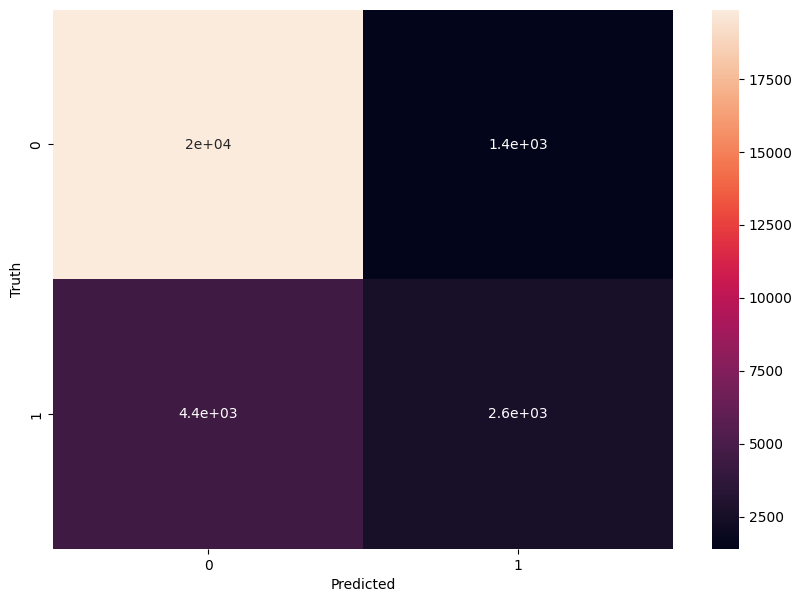

In [55]:
y_pred1 = best_rf1.predict(X_test_downsampled)
cm1 = confusion_matrix(y_test_downsampled, y_pred1)
plt.figure(figsize=(10,7))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [8]:
from imblearn.over_sampling import SMOTE

# Number of samples to add
n_minority = (y_down == 1).sum()
target_minority = int(n_minority * 1.3)

smote = SMOTE(
    sampling_strategy={1: target_minority},
    random_state=42,
    k_neighbors=5
)

X_over, y_over = smote.fit_resample(X_down, y_down)

print(y_over.value_counts())



Diabetes_binary
0    106038
1     45949
Name: count, dtype: int64


In [43]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [44]:
X_train_oversampled

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
3994,0,0,1,23,1,0,0,0,0,0,...,1,0,5,0,30,0,1,10,5,2
15278,1,1,1,27,1,0,0,1,0,1,...,1,0,2,0,0,0,1,9,5,8
50537,0,0,1,21,0,0,0,1,1,1,...,1,0,1,0,0,0,0,8,6,8
113273,0,0,0,26,1,0,0,1,1,1,...,1,0,1,15,0,0,1,6,6,8
109927,1,1,1,35,0,0,0,1,0,1,...,1,0,4,0,1,0,1,8,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,1,19,1,0,0,1,1,1,...,1,0,3,0,0,0,0,11,6,7
103694,1,1,1,38,0,0,0,1,0,0,...,1,0,3,15,5,0,1,6,5,6
131932,0,0,1,28,0,0,0,0,0,0,...,1,1,2,0,0,0,1,2,6,6
146867,1,0,1,40,0,0,0,0,0,1,...,1,0,4,0,30,1,0,10,5,1


In [48]:
y_train_oversampled

3994      0
15278     0
50537     0
113273    0
109927    0
         ..
119879    0
103694    1
131932    0
146867    1
121958    0
Name: Diabetes_binary, Length: 121589, dtype: int64

In [46]:
X_test_oversampled

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
226,0,0,1,22,1,0,0,1,1,1,...,1,0,2,0,0,0,1,5,3,8
22811,0,0,1,36,1,0,0,1,1,1,...,1,0,3,0,15,1,0,13,6,4
139525,0,0,1,27,0,0,0,1,1,1,...,0,0,1,0,4,0,0,9,5,6
93043,0,0,1,40,1,0,0,1,1,1,...,1,0,5,0,5,0,0,3,5,4
101307,0,0,1,26,1,0,0,1,1,1,...,1,0,2,0,0,0,1,13,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142454,1,1,1,31,0,0,0,0,0,0,...,1,0,3,10,1,0,1,11,5,8
72737,0,1,1,33,0,0,0,1,1,1,...,0,0,2,30,0,0,0,6,5,5
46184,1,0,1,32,1,0,0,0,1,1,...,0,1,5,30,30,1,0,7,3,7
83429,1,0,1,25,1,0,0,1,0,1,...,1,0,2,0,1,0,0,9,6,8


In [47]:
y_test_oversampled

226       0
22811     1
139525    0
93043     1
101307    1
         ..
142454    1
72737     0
46184     0
83429     1
93582     0
Name: Diabetes_binary, Length: 30398, dtype: int64

In [61]:
f2_scorer = make_scorer(fbeta_score, beta=2)

def objective2(trial):
    model2 = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 200, 1600),
        max_depth=trial.suggest_int('max_depth', 2, 64, log=True),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    cv2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores2 = cross_val_score(
        model2,
        X_train_oversampled,
        y_train_oversampled,
        cv=cv2,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores2.mean()

study2 = optuna.create_study(direction='maximize', study_name='RandomForestClassifier')
study2.optimize(objective2, n_trials=100, show_progress_bar=True)


[I 2026-01-24 18:07:00,476] A new study created in memory with name: RandomForestClassifier


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2026-01-24 18:07:06,035] Trial 0 finished with value: 0.7046302422331449 and parameters: {'n_estimators': 479, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7046302422331449.
[I 2026-01-24 18:07:09,301] Trial 1 finished with value: 0.7074130638673807 and parameters: {'n_estimators': 216, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.7074130638673807.
[I 2026-01-24 18:07:27,646] Trial 2 finished with value: 0.7215701035869996 and parameters: {'n_estimators': 978, 'max_depth': 29, 'min_samples_split': 12, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.7215701035869996.
[I 2026-01-24 18:07:36,036] Trial 3 finished with value: 0.7193474222363466 and parameters: {'n_estimators': 394, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 9, 'max_

In [62]:
best_rf2 = RandomForestClassifier(**study2.best_params, random_state=42, n_jobs=-1)
best_rf2.fit(X_train_oversampled, y_train_oversampled)


,n_estimators,1425
,criterion,'gini'
,max_depth,28
,min_samples_split,16
,min_samples_leaf,18
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


Text(95.72222222222221, 0.5, 'Truth')

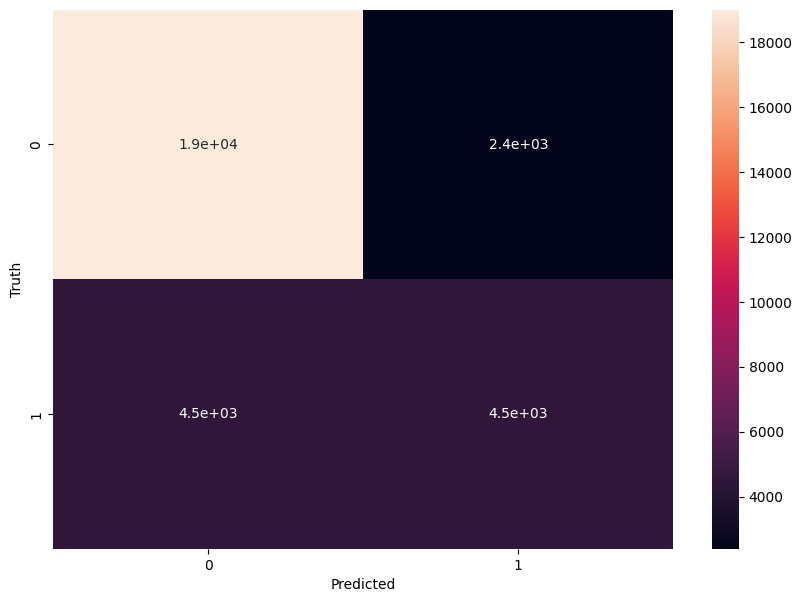

In [63]:
y_pred2 = best_rf2.predict(X_test_oversampled)
cm2 = confusion_matrix(y_test_oversampled, y_pred2)
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
from sklearn.utils import resample

# Combine X and y for easy manipulation
df1 = X_over.copy()
df1['Diabetes_binary'] = y_over.values

# Separate classes
df_majority1 = df1[df1['Diabetes_binary'] == 0]
df_minority1 = df1[df1['Diabetes_binary'] == 1]

print(df_majority1.shape, df_minority1.shape)


(106038, 22) (45949, 22)


In [12]:
n_minority1 = len(df_minority1)
n_majority_down1 = n_minority1 * 2  # 2:1 ratio

df_majority_downsampled1 = resample(
    df_majority1,
    replace=False,
    n_samples=n_majority_down1,
    random_state=42
)

# Combine back
df_downsampled1 = pd.concat([df_majority_downsampled1, df_minority1])

# Shuffle
df_downsampled1 = df_downsampled1.sample(frac=1, random_state=42)

# Split back into X, y
X_down1 = df_downsampled1.drop(columns='Diabetes_binary')
y_down1 = df_downsampled1['Diabetes_binary']

print(y_down1.value_counts())


Diabetes_binary
0    91898
1    45949
Name: count, dtype: int64


In [13]:
X_down1

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
92419,0,1,1,30,0,0,1,1,1,1,...,1,0,3,0,0,1,0,11,5,5
136234,0,0,1,25,1,0,0,1,1,1,...,0,0,3,0,2,0,1,3,4,4
148255,0,0,1,27,0,0,0,0,0,0,...,1,0,3,0,4,0,0,7,3,1
23614,0,0,1,28,0,0,0,1,0,0,...,1,0,2,0,0,0,0,4,5,7
147537,0,0,1,22,1,0,0,1,0,1,...,0,0,4,14,7,0,0,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73109,0,1,1,29,1,0,0,1,0,1,...,1,0,3,5,30,1,1,10,6,5
111998,0,1,1,32,1,0,1,0,0,1,...,1,1,3,0,0,0,0,7,4,3
47440,1,1,1,39,0,0,0,1,1,1,...,1,0,4,10,25,1,0,10,6,4
146072,1,1,1,35,0,0,0,1,1,0,...,1,0,3,0,0,0,1,7,5,8


In [14]:
y_down1

92419     1
136234    0
148255    1
23614     0
147537    1
         ..
73109     1
111998    1
47440     1
146072    1
120154    1
Name: Diabetes_binary, Length: 137847, dtype: int64

In [64]:
X_down1 = X_down1.drop(columns=['CholCheck'])

In [65]:
X_train_down1, X_test_down1, y_train_down1, y_test_down1 = train_test_split(X_down1, y_down1, test_size=0.2, random_state=42)

In [66]:
X_train_down1

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
82177,1,0,65,0,0,0,0,0,0,0,1,0,4,0,3,1,0,8,6,7
122066,1,1,33,1,0,0,1,1,1,0,1,0,2,0,14,0,1,11,4,7
106674,0,0,23,1,0,0,1,1,1,0,1,0,1,0,0,0,0,5,6,8
65186,1,0,25,1,0,0,1,1,1,0,1,0,4,0,7,0,1,10,3,1
29167,1,0,28,0,0,0,1,1,1,0,1,0,2,0,1,0,1,6,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130971,1,0,23,1,0,0,0,0,1,0,1,0,3,14,3,0,1,8,5,1
25324,0,0,24,1,0,0,0,0,0,0,1,0,2,7,2,0,0,7,6,8
53216,1,1,31,1,1,1,1,0,1,0,1,0,4,2,2,0,1,9,3,7
105332,0,0,22,1,0,0,0,0,1,0,1,0,1,0,0,0,1,7,6,6


In [67]:
y_train_down1

82177     0
122066    0
106674    0
65186     1
29167     0
         ..
130971    0
25324     0
53216     1
105332    0
97025     1
Name: Diabetes_binary, Length: 110277, dtype: int64

In [68]:
X_test_down1

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2232,1,1,33,1,0,0,1,0,0,0,1,0,5,30,30,1,0,7,3,1
88036,1,1,27,1,1,1,1,1,1,0,1,0,3,5,3,1,0,13,4,3
14223,1,1,31,1,1,0,0,0,1,0,1,0,3,15,0,1,1,10,5,7
90124,1,1,29,0,0,0,1,1,1,0,1,0,4,0,15,1,0,7,3,5
58277,1,1,30,1,0,1,1,1,1,0,1,0,3,0,0,0,1,8,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77895,0,1,27,1,0,0,1,1,1,0,1,0,2,0,0,0,0,8,6,8
137391,1,1,22,0,0,0,1,1,1,0,1,0,4,0,30,1,1,12,4,2
103178,1,0,25,0,0,0,1,0,0,0,1,0,2,2,2,0,0,8,6,8
80075,0,0,32,0,0,0,1,1,1,0,1,0,3,0,0,0,1,1,6,7


In [69]:
y_test_down1

2232      0
88036     0
14223     1
90124     1
58277     1
         ..
77895     1
137391    1
103178    0
80075     0
78628     0
Name: Diabetes_binary, Length: 27570, dtype: int64

In [70]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

def objective3(trial):
    model3 = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 200, 1000),
        max_depth=trial.suggest_int('max_depth', 2, 64, log=True),
        min_samples_split=trial.suggest_int('min_samples_split', 5, 30),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 5, 30),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    cv3 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores3 = cross_val_score(
        model3,
        X_train_down1,
        y_train_down1,
        cv=cv3,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores3.mean()

study3 = optuna.create_study(direction='maximize', study_name='RandomForestClassifier')
study3.optimize(objective3, n_trials=200, show_progress_bar=True)


[I 2026-01-26 01:47:18,587] A new study created in memory with name: RandomForestClassifier


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2026-01-26 01:47:24,442] Trial 0 finished with value: 0.7295298249950998 and parameters: {'n_estimators': 247, 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.7295298249950998.
[I 2026-01-26 01:47:28,328] Trial 1 finished with value: 0.7111171749001443 and parameters: {'n_estimators': 429, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 25, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.7295298249950998.
[I 2026-01-26 01:47:33,012] Trial 2 finished with value: 0.7300999181703699 and parameters: {'n_estimators': 205, 'max_depth': 34, 'min_samples_split': 16, 'min_samples_leaf': 27, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.7300999181703699.
[I 2026-01-26 01:47:43,391] Trial 3 finished with value: 0.7293282986788857 and parameters: {'n_estimators': 496, 'max_depth': 63, 'min_samples_split': 27, 'min_samples_leaf': 6, 'max

In [23]:
neg = np.sum(y_train_down1 == 0)
pos = np.sum(y_train_down1 == 1)

pos_weight = neg / pos

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

def objective4(trial):
    model4 = XGBClassifier(
    n_estimators=trial.suggest_int("n_estimators", 200, 1600),
    max_depth=trial.suggest_int("max_depth", 3, 30),
    learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5, log=True),

    min_child_weight=trial.suggest_int("min_child_weight", 2, 30),
    gamma=trial.suggest_float("gamma", 0.0, 5.0),

    subsample=trial.suggest_float("subsample", 0.7, 1.0),
    colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),

    reg_alpha=trial.suggest_float("reg_alpha", 0.0, 10.0),
    reg_lambda=trial.suggest_float("reg_lambda", 1.0, 10.0),

    scale_pos_weight=pos_weight, 
    objective="binary:logistic",
    eval_metric="logloss",

    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

    cv4 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores4 = cross_val_score(
        model4,
        X_train_down1,
        y_train_down1,
        cv=cv4,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores4.mean()

study4 = optuna.create_study(direction='maximize', study_name='XGBClassifier')
study4.optimize(objective4, n_trials=200, show_progress_bar=True)



[I 2026-01-26 02:28:07,692] A new study created in memory with name: XGBClassifier


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2026-01-26 02:28:10,918] Trial 0 finished with value: 0.7335734865952883 and parameters: {'n_estimators': 573, 'max_depth': 4, 'learning_rate': 0.11389186361588405, 'min_child_weight': 11, 'gamma': 4.155024384727238, 'subsample': 0.9840372961600472, 'colsample_bytree': 0.756180129417646, 'reg_alpha': 8.881934595879725, 'reg_lambda': 3.699507523446683}. Best is trial 0 with value: 0.7335734865952883.
[I 2026-01-26 02:28:16,579] Trial 1 finished with value: 0.7298825055081787 and parameters: {'n_estimators': 1030, 'max_depth': 11, 'learning_rate': 0.31636480125529876, 'min_child_weight': 11, 'gamma': 4.695729397169024, 'subsample': 0.7597418022585679, 'colsample_bytree': 0.7593023074370264, 'reg_alpha': 1.1222795529500063, 'reg_lambda': 8.34021723084092}. Best is trial 0 with value: 0.7335734865952883.
[I 2026-01-26 02:28:25,554] Trial 2 finished with value: 0.7149994597859669 and parameters: {'n_estimators': 1263, 'max_depth': 4, 'learning_rate': 0.39173523164185753, 'min_child_weigh

In [27]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [28]:
X_train_down1.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [29]:
best_xg = XGBClassifier(**study4.best_params, random_state=42, n_jobs=-1)
best_xg.fit(X_train_down1, y_train_down1)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7807413396327751
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.13)
X_vt = vt.fit_transform(X)

kept_features = X.columns[vt.get_support()]

kept_features

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [52]:
X = X[kept_features]

In [53]:
X.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [60]:

corr = X.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > 0.2)]
to_drop

['HighChol',
 'BMI',
 'Veggies',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

In [62]:
importances4 = best_xg.feature_importances_

imp_df4 = (
    pd.DataFrame({"feature": X_train_down1.columns, "importance": importances4})
      .sort_values("importance", ascending=False)
)

In [63]:
imp_df4

,feature,importance
0,HighBP,0.543578
13,GenHlth,0.177966
3,BMI,0.034792
1,HighChol,0.032505
18,Age,0.031948
16,DiffWalk,0.028925
10,HvyAlcoholConsump,0.020534
2,CholCheck,0.018337
20,Income,0.013256
6,HeartDiseaseorAttack,0.011206


In [75]:
X.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [76]:
features_to_drop = [
    "MentHlth",
    "Fruits",
    "Veggies",
]

X_reduced = X.drop(columns=features_to_drop)


In [77]:
X_reduced

,HighBP,HighChol,BMI,Smoker,PhysActivity,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,40,1,0,5,15,1,0,9,4,3
1,0,0,25,1,1,3,0,0,0,7,6,1
2,1,1,28,0,0,5,30,1,0,9,4,8
3,1,0,27,0,1,2,0,0,0,11,3,6
4,1,1,24,0,1,2,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,45,0,0,3,5,0,1,5,6,7
253676,1,1,18,0,0,4,0,1,0,11,2,4
253677,0,0,28,0,1,1,0,0,0,2,5,2
253678,1,0,23,0,0,3,0,0,1,7,5,1


In [78]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [82]:
y.value_counts()

Diabetes_binary
0                  218334
1                   35346
Name: count, dtype: int64

In [83]:
from sklearn.utils import resample

# Combine X and y for easy manipulation
df2 = X.copy()
df2['Diabetes_binary'] = y.values

# Separate classes
df_majority2 = df2[df2['Diabetes_binary'] == 0]
df_minority2 = df2[df2['Diabetes_binary'] == 1]

print(df_majority2.shape, df_minority2.shape)


(218334, 16) (35346, 16)


In [84]:
n_minority2 = len(df_minority2)
n_majority_down2 = n_minority2 * 2  # 2:1 ratio

df_majority_downsampled2 = resample(
    df_majority2,
    replace=False,
    n_samples=n_majority_down2,
    random_state=42
)

# Combine back
df_downsampled2 = pd.concat([df_majority_downsampled2, df_minority2])

# Shuffle
df_downsampled2 = df_downsampled2.sample(frac=1, random_state=42)

# Split back into X, y
X_down2 = df_downsampled2.drop(columns='Diabetes_binary')
y_down2 = df_downsampled2['Diabetes_binary']

print(y_down2.value_counts())


Diabetes_binary
0    70692
1    35346
Name: count, dtype: int64


In [85]:
from imblearn.over_sampling import SMOTE

# Number of samples to add
n_minority3 = (y_down2 == 1).sum()
target_minority3 = int(n_minority3 * 1.5)

smote3 = SMOTE(
    sampling_strategy={1: target_minority3},
    random_state=42,
    k_neighbors=5
)

X_over3, y_over3 = smote3.fit_resample(X_down2, y_down2)

print(y_over3.value_counts())



Diabetes_binary
0    70692
1    53019
Name: count, dtype: int64


In [86]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_over3, y_over3, test_size=0.2, random_state=42)

In [87]:
X_train_reduced

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
43776,0,1,27,1,0,1,1,2,0,14,0,0,7,4,7
8999,1,1,23,1,1,1,1,1,0,0,0,0,9,6,7
61137,1,1,33,0,1,1,1,4,0,30,0,0,12,4,5
27173,0,1,28,0,1,0,1,4,28,15,0,0,8,6,8
22009,0,0,22,0,1,1,0,1,0,0,0,1,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,34,0,0,0,1,3,0,0,0,0,8,3,2
103694,0,1,27,0,0,1,1,3,0,0,1,1,12,4,8
860,1,0,27,0,1,1,1,3,0,2,0,0,12,4,4
15795,0,0,26,0,1,1,1,3,0,0,0,1,7,6,8


In [88]:
y_train_reduced

43776     0
8999      0
61137     1
27173     0
22009     0
         ..
119879    1
103694    1
860       1
15795     0
121958    1
Name: Diabetes_binary, Length: 98968, dtype: int64

In [89]:
X_test_reduced

,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
45685,0,1,27,0,0,0,1,2,0,0,0,1,9,6,8
52424,0,0,26,0,0,0,1,4,0,10,1,0,4,4,2
50679,1,1,32,0,1,1,1,4,0,5,0,0,7,5,8
114152,0,0,37,1,0,1,1,4,0,0,1,0,7,5,7
11856,1,0,30,0,1,1,0,3,0,0,0,0,11,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44147,0,0,29,1,0,0,1,3,30,30,0,0,8,4,2
92624,0,1,30,0,1,0,1,2,0,0,0,1,10,6,8
113496,0,1,31,0,1,1,1,3,0,0,0,1,9,6,8
66870,0,0,22,1,1,1,1,3,0,0,0,1,9,5,3


In [90]:
y_test_reduced

45685     0
52424     0
50679     0
114152    1
11856     1
         ..
44147     0
92624     0
113496    1
66870     0
2546      0
Name: Diabetes_binary, Length: 24743, dtype: int64

In [91]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

f2_scorer = make_scorer(fbeta_score, beta=2)

def objective_reduced(trial):
    model_reduced = XGBClassifier(
    n_estimators=trial.suggest_int("n_estimators", 200, 1600),
    max_depth=trial.suggest_int("max_depth", 3, 30),
    learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5, log=True),

    min_child_weight=trial.suggest_int("min_child_weight", 2, 30),
    gamma=trial.suggest_float("gamma", 0.0, 5.0),

    subsample=trial.suggest_float("subsample", 0.7, 1.0),
    colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),

    reg_alpha=trial.suggest_float("reg_alpha", 0.0, 10.0),
    reg_lambda=trial.suggest_float("reg_lambda", 1.0, 10.0),

    scale_pos_weight=pos_weight, 
    objective="binary:logistic",
    eval_metric="logloss",

    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

    cv_reduced = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores_reduced = cross_val_score(
        model_reduced,
        X_train_reduced,
        y_train_reduced,
        cv=cv_reduced,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores_reduced.mean()

study_reduced = optuna.create_study(direction='maximize', study_name='XGBClassifier')
study_reduced.optimize(objective_reduced, n_trials=200, show_progress_bar=True)



[I 2026-01-26 03:17:01,882] A new study created in memory with name: XGBClassifier


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2026-01-26 03:17:09,863] Trial 0 finished with value: 0.8029369608827805 and parameters: {'n_estimators': 1069, 'max_depth': 6, 'learning_rate': 0.07009463818577204, 'min_child_weight': 18, 'gamma': 0.43640035026215773, 'subsample': 0.9036869591265938, 'colsample_bytree': 0.6076086248202186, 'reg_alpha': 0.8228969479330239, 'reg_lambda': 7.119721377891935}. Best is trial 0 with value: 0.8029369608827805.
[I 2026-01-26 03:17:13,330] Trial 1 finished with value: 0.804751449199053 and parameters: {'n_estimators': 481, 'max_depth': 11, 'learning_rate': 0.06613566641409067, 'min_child_weight': 23, 'gamma': 4.879054119083781, 'subsample': 0.9733650248643839, 'colsample_bytree': 0.9707684122264986, 'reg_alpha': 8.72880265613777, 'reg_lambda': 7.648848960117256}. Best is trial 1 with value: 0.804751449199053.
[I 2026-01-26 03:17:19,869] Trial 2 finished with value: 0.804858530204412 and parameters: {'n_estimators': 1097, 'max_depth': 3, 'learning_rate': 0.0459953905232303, 'min_child_weight

In [93]:

f2_scorer = make_scorer(fbeta_score, beta=2)

def objective_reduced_rfc(trial):
    model_rfc = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 200, 1600),
        max_depth=trial.suggest_int('max_depth', 2, 64, log=True),
        min_samples_split=trial.suggest_int('min_samples_split', 5, 30),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 5, 30),
        max_features=trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    cv_rfc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scores_rfc = cross_val_score(
        model_rfc,
        X_train_reduced,
        y_train_reduced,
        cv=cv_rfc,
        scoring=f2_scorer,
        n_jobs=-1
    )

    return scores_rfc.mean()

study_rfc = optuna.create_study(direction='maximize', study_name='RandomForestClassifier')
study_rfc.optimize(objective_reduced_rfc, n_trials=200, show_progress_bar=True)


[I 2026-01-26 03:32:36,857] A new study created in memory with name: RandomForestClassifier


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2026-01-26 03:32:42,141] Trial 0 finished with value: 0.7592446806329807 and parameters: {'n_estimators': 560, 'max_depth': 24, 'min_samples_split': 22, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7592446806329807.
[I 2026-01-26 03:32:52,021] Trial 1 finished with value: 0.7539231613416295 and parameters: {'n_estimators': 1402, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 13, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.7592446806329807.
[I 2026-01-26 03:33:04,040] Trial 2 finished with value: 0.7588371352882074 and parameters: {'n_estimators': 1191, 'max_depth': 27, 'min_samples_split': 26, 'min_samples_leaf': 17, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.7592446806329807.
[I 2026-01-26 03:33:06,389] Trial 3 finished with value: 0.7473292621050629 and parameters: {'n_estimators': 354, 'max_depth': 5, 'min_samples_split': 27, 'min_samples_leaf': 9, 'max_f

In [94]:
best_reduced_xg = XGBClassifier(**study_reduced.best_params)
best_reduced_xg.fit(X_train_reduced, y_train_reduced)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6137915382430955
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [96]:
y_pred_reduced = best_reduced_xg.predict(X_test_reduced)

In [97]:
y_pred_reduced

array([0, 0, 1, ..., 0, 0, 0])

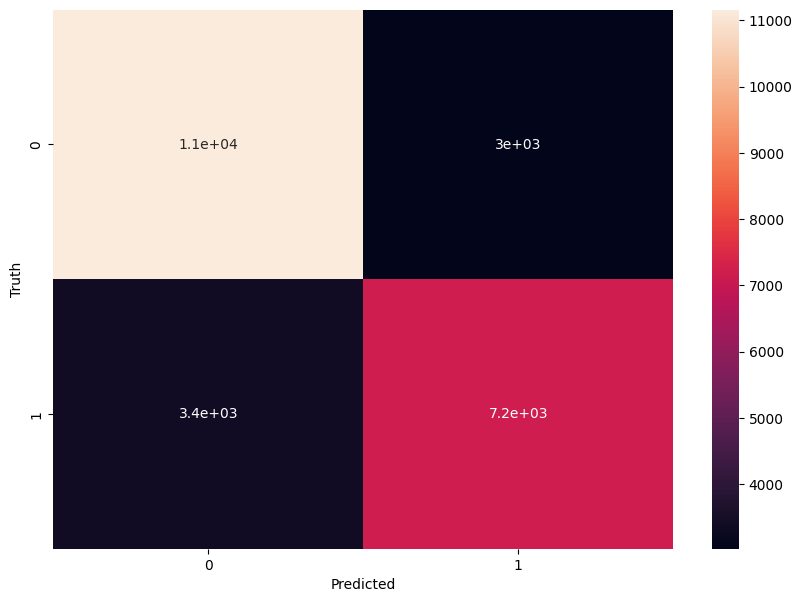

In [99]:
cm_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)
plt.figure(figsize=(10,7))
sns.heatmap(cm_reduced, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [100]:
print("Accuracy score: ", accuracy_score(y_test_reduced, y_pred_reduced))
print("Precision score: ", precision_score(y_test_reduced, y_pred_reduced))
print("Recall score: ", recall_score(y_test_reduced, y_pred_reduced))
print("F1 score: ", f1_score(y_test_reduced, y_pred_reduced))
print("f2 score: ", fbeta_score(y_test_reduced, y_pred_reduced, beta=2))
print("Classification report: ", classification_report(y_test_reduced, y_pred_reduced))

Accuracy score:  0.7407751687345916
Precision score:  0.7032169478226755
Recall score:  0.6791058912672855
F1 score:  0.69095114194854
f2 score:  0.6837949187457084
Classification report:                precision    recall  f1-score   support

           0       0.77      0.79      0.78     14185
           1       0.70      0.68      0.69     10558

    accuracy                           0.74     24743
   macro avg       0.74      0.73      0.73     24743
weighted avg       0.74      0.74      0.74     24743

